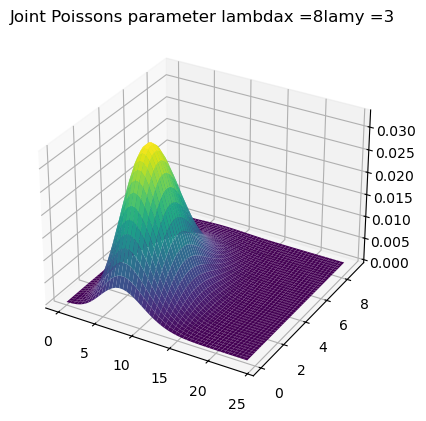

In [399]:
## Poisson Probability of event occurring, given 2 event-based poission processes
import math
import numpy
from scipy.special import factorial
lamx = 8
lamy = 3
def f(x,y):
    return ((lamx**x * numpy.exp(-lamx)) / factorial(x)) * (lamy**y * numpy.exp(-lamy)) / factorial(y)


x = np.linspace(0,3*lamx,50)
y = np.linspace(0,3*lamy,50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title(f'Joint Poissons parameter lambdax ={lamx}lamy ={lamy}');


(array([ 47., 132., 243., 229., 166.,  94.,  49.,  21.,  13.,   6.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

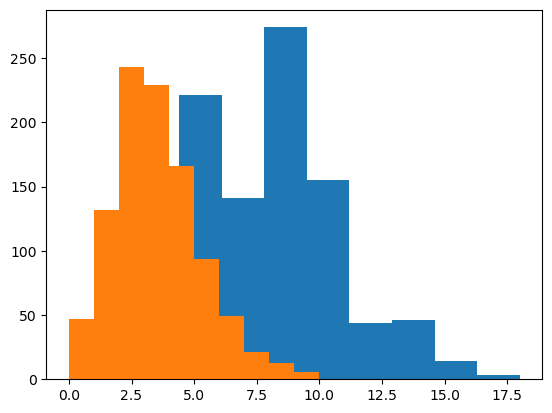

In [400]:
## Pulling distribution example to estimate distribution 
import numpy as np
import matplotlib 
size = 1000  # number of samples

samplesx = np.random.poisson(lam=lamx, size=size)

plt.hist(samplesx, bins = 10)

## Pulling distribution example to estimate distribution 
import numpy as np
import matplotlib 


samplesy = np.random.poisson(lam=lamy, size=size)

plt.hist(samplesy, bins = 10)

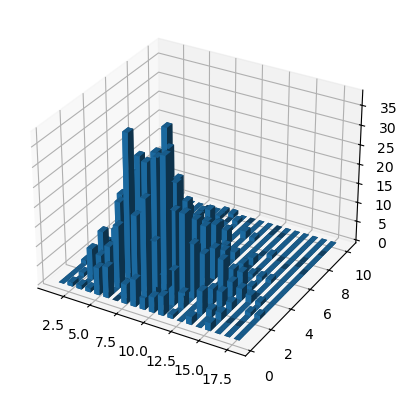

In [401]:
# 3d histogram of x, y poissons
import matplotlib.pyplot as plt
import numpy as np



fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x = samplesx
y = samplesy
hist, xedges, yedges = np.histogram2d(x, y, bins=20)

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

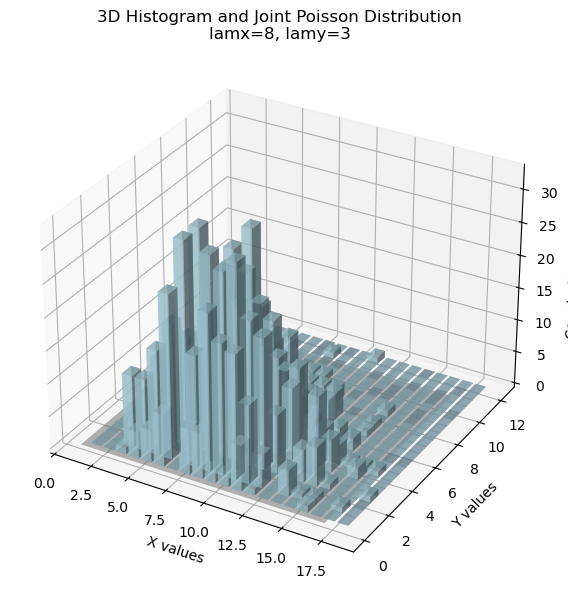

In [436]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

# Parameters for Poisson
lamx = 8
lamy = 3

# Poisson joint probability function
def f(x, y):
    return ((lamx**x * np.exp(-lamx)) / factorial(x)) * ((lamy**y * np.exp(-lamy)) / factorial(y))

# Generate Poisson samples
samplesx = np.random.poisson(lamx, 1000)
samplesy = np.random.poisson(lamy, 1000)

# Compute 2D histogram with fixed bins
bins = 20
hist, xedges, yedges = np.histogram2d(samplesx, samplesy, bins=bins)

# Prepare positions for the bars (bin centers)
xpos, ypos = np.meshgrid((xedges[:-1] + xedges[1:]) / 2,
                         (yedges[:-1] + yedges[1:]) / 2, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = np.zeros_like(xpos)

# Bar dimensions
dx = dy = (xedges[1] - xedges[0]) * 0.8  # slightly smaller than bin width
dz = hist.ravel()

# Prepare grid for theoretical surface (use integers to align with Poisson support)
X, Y = np.meshgrid(np.arange(xedges[0], xedges[-1]),
                   np.arange(yedges[0], yedges[-1]), indexing="ij")
Z = f(X, Y)

# Prepare transparent grey facecolors for theoretical surface
grey_color = (0.5, 0.5, 0.5, 0.4)  # RGB grey + alpha transparency
facecolors = np.empty(X.shape + (4,))
facecolors[:] = grey_color

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot histogram bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz,
         color='lightblue', alpha=0.6, zsort='average')

# Plot theoretical joint Poisson probability surface (transparent grey)
ax.plot_surface(X, Y, Z, facecolors=facecolors, edgecolor='none', alpha=0.4)

# Labels and title
ax.set_xlabel('X values')
ax.set_ylabel('Y values')
ax.set_zlabel('Counts / Probability')
ax.set_title(f'3D Histogram and Joint Poisson Distribution\nlamx={lamx}, lamy={lamy}')

plt.show()
